# Biblioteki

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get data

In [2]:
csv_file = "song_data.csv"
df = pd.read_csv(csv_file)

# Opis danych

**song_name** : *object* - nazwa piosenki

**song_popularity** : *integer* - Popularność utworu. Wartość będzie mieścić się w przedziale od 0 do 100, przy czym 100 oznacza największą popularność. Popularność jest obliczana za pomocą algorytmu i opiera się głównie na całkowitej liczbie odtworzeń utworu i na tym, jak niedawno te odtworzenia miały miejsce. Ogólnie rzecz biorąc, utwory, które są obecnie często odtwarzane, będą miały wyższą popularność niż utwory, które były często odtwarzane w przeszłości. Zduplikowane utwory (np. ten sam utwór z singla i albumu) są oceniane niezależnie. Popularność artysty i albumu jest wyznaczana matematycznie na podstawie popularności utworu.

**song_duration_ms** : *integer* - Czas trwania piosenki w milisekundach.

**acousticness** : *float* - Mówi o tym jak dużą mamy pewność, że piosenka jest akustyczna. 1.0 oznacza dużą pewność.

**danceability** : *float* - Ocena jak bardzo taneczna jest piosenka, na podstawie kombinacji aspektów muzycznych, takich jak tempo, rytm, beat. 0.0 to najmniejsza taneczność a 1.0 to największa.

**energy** : *float* - Mierzy energiczność piosenki w oparciu o dynamikę, głośność, barwę dżwięku, częstotliwość i ogólną entropię.

**instrumentalness** : *float* - Przewidywanie czy muzyka nie zawiera wokalu. Im bliżej do 1.0 tym większe prawdopodobieństwo, że piosenka nie zawiera wokalu. Wartości powyżej 0.5 mają reprezentować utwory intrumentalne.

**key** : *integer* - Tonacja utworu. 0 to C, 1 to C#/D♭, itd. Jeżeli tonacja jest nie podana przyjmuje wartość -1.

**liveness** : *float* - Wykrywa obecność publiczności w nagraniu. Wyższe wartości żywotności reprezentują zwiększone prawdopodobieństwo, że utwór został wykonany na żywo. Wartość powyżej 0,8 stanowi silne prawdopodobieństwo, że utwór jest nagraniem na żywo.

**audio_mode** : *binary* - Tryb wskazuje modalność (durową lub molową) utworu, czyli rodzaj skali, z której pochodzi jego treść melodyczna. Durowa jest reprezentowana przez 1, a molowa przez 0.

**speechiness** : *float* - Wykrywa obecność mówionych słów w utworze. Im bardziej nagranie przypomina mowę (np. talk-show, audiobook, poezja), tym bliżej wartość atrybutu jest do 1,0. Wartości powyżej 0,66 opisują utwory, które prawdopodobnie składają się całkowicie z mówionych słów. Wartości między 0,33 a 0,66 opisują utwory, które mogą zawierać zarówno muzykę, jak i mowę, zarówno w sekcjach, jak i warstwach, w tym przypadku muzyki rap. Wartości poniżej 0,33 najprawdopodobniej reprezentują muzykę i inne utwory niespokojne.

**tempo** : *float* - Ogólnie szacowane tempo utworu wyrażone w uderzeniach na minutę (BPM). Przykład: 118.211 BPM

**time_signature** : *integer* - Szacowane metrum utworu. Metrum określa, ile uderzeń zawiera każda takt (czyli każda "miara"). Metrum jest wyrażane jako liczba uderzeń w takt, na przykład "3/4" lub "7/4".

**audio_valence** : *float* - Miara od 0.0 do 1.0 opisująca muzyczną pozytywność przekazywaną przez utwór. Utwory z wysoka wartością brzmią bardziej pozytywnie (np. szczęśliwie, radośnie, euforycznie), podczas gdy utwory o niskiej mierze brzmią bardziej negatywnie (np. smutnie, przygnębiono, gniewnie).

W przypadku zmiennych **key** oraz **tempo**, konieczne będzie użycie techniki One Hot Encoding, w celu zapisu ich jako zmienne binarne.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


# Usuwanie duplikatów

In [4]:
counter = Counter(df['song_name'])
if len(Counter({k: c for k, c in counter.items() if c > 1})) != 0:
    df = df.drop_duplicates(subset='song_name')
    df = df.reset_index(drop=True)

# Statystyki

In [5]:
df.describe().transpose()

count           mean           std           min  \
song_popularity   13070.0      48.487682     20.108158      0.000000   
song_duration_ms  13070.0  218627.396098  63450.564891  12000.000000   
acousticness      13070.0       0.277770      0.301784      0.000001   
danceability      13070.0       0.625010      0.159125      0.000000   
energy            13070.0       0.635722      0.223985      0.001070   
instrumentalness  13070.0       0.096672      0.246570      0.000000   
key               13070.0       5.319510      3.583933      0.000000   
liveness          13070.0       0.180517      0.145377      0.011900   
loudness          13070.0      -7.790448      4.110762    -38.768000   
audio_mode        13070.0       0.632976      0.482011      0.000000   
speechiness       13070.0       0.100839      0.105197      0.000000   
tempo             13070.0     121.151915     29.105418      0.000000   
time_signature    13070.0       3.951568      0.319291      0.000000   
audio_valence     13070.0       0.528564      0.248652      0.000000   

                           25%            50%           75%          max  
song_popularity       37.00000      51.000000      63.00000      100.000  
song_duration_ms  182967.25000  211486.000000  244506.00000  1799346.000  
acousticness           0.02500       0.147000       0.47975        0.996  
danceability           0.52425       0.637000       0.74100        0.987  
energy                 0.49000       0.667000       0.81500        0.999  
instrumentalness       0.00000       0.000022       0.00591        0.997  
key                    2.00000       5.000000       8.00000       11.000  
liveness               0.09330       0.121000       0.22300        0.986  
loudness              -9.53725      -6.859500      -5.04125        1.585  
audio_mode             0.00000       1.000000       1.00000        1.000  
speechiness            0.03730       0.054400       0.11500        0.941  
tempo                 98.06950     120.025000     139.95575      242.318  
time_signature         4.00000       4.000000       4.00000        5.000  
audio_valence          0.33400       0.529000       0.73000        0.984

In [6]:
cat = df[["key", "audio_mode", "time_signature"]].copy()
num = df.drop(["song_name", "key", "audio_mode", "time_signature"], axis=1)
Y = df["song_popularity"]

# Wizualizacja

C:\Users\kubal\AppData\Local\Temp\ipykernel_14076\3671173543.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  num.hist(ax=ax)


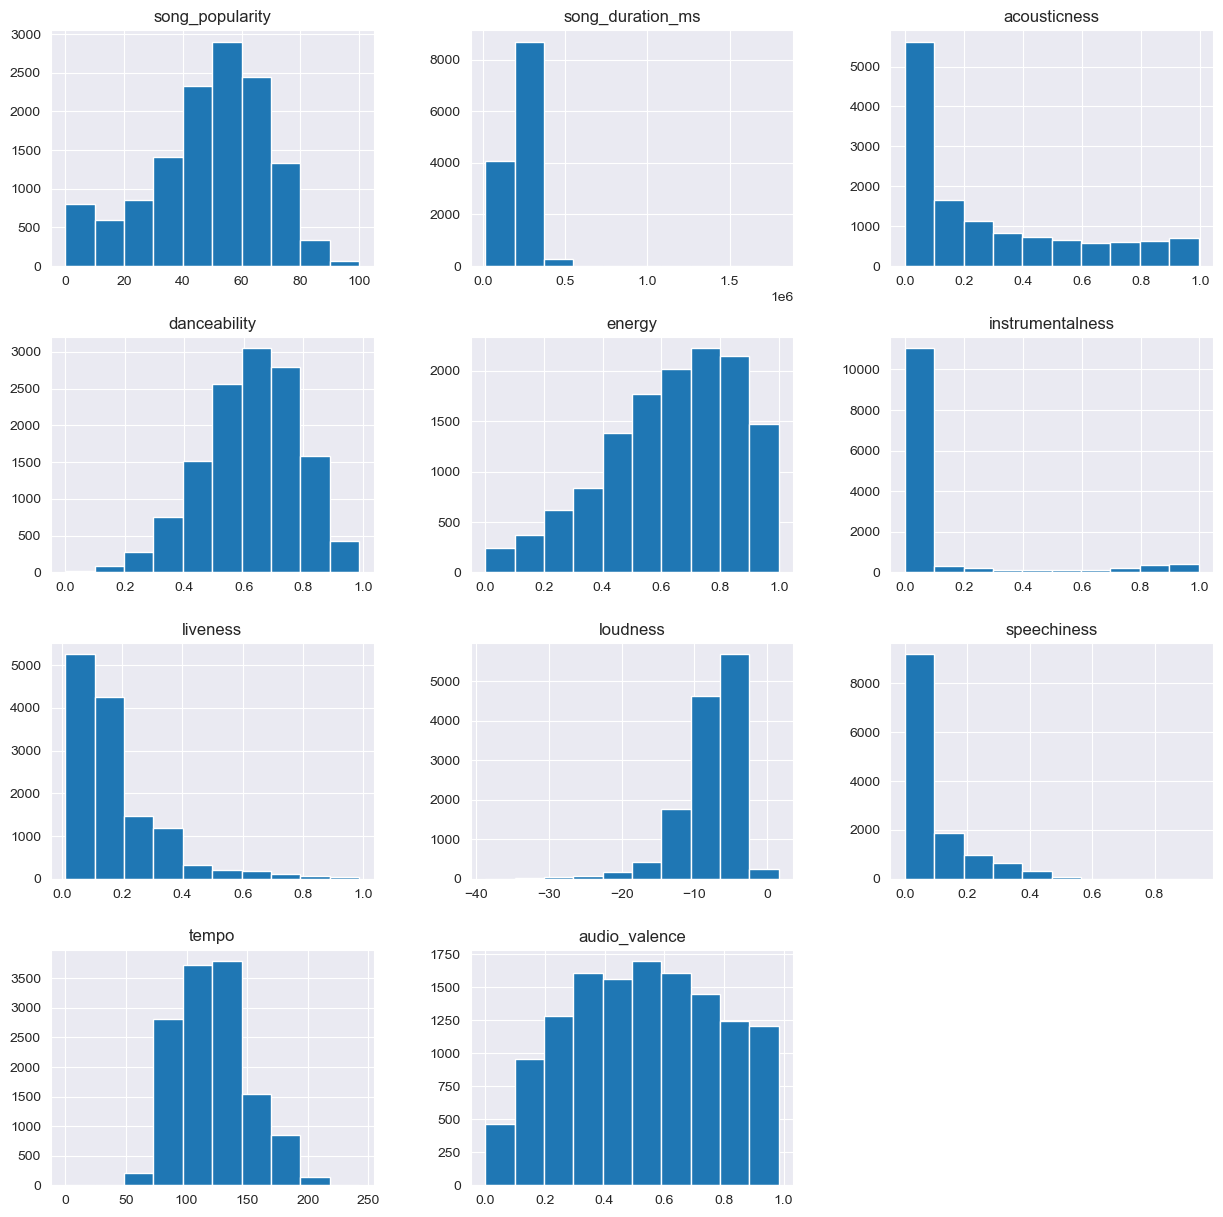

In [7]:
#Numerical variables
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
num.hist(ax=ax)
plt.show()

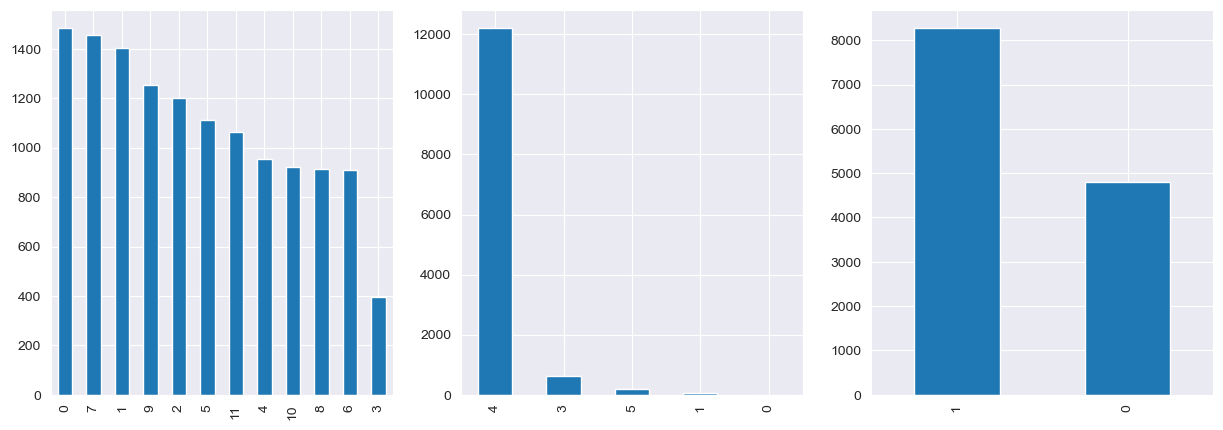

In [8]:
# Categorical values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
cat["key"].value_counts().plot(kind='bar', ax=ax1)
cat["time_signature"].value_counts().plot(kind='bar', ax=ax2)
cat["audio_mode"].value_counts().plot(kind='bar', ax=ax3)
plt.show()

# Zmienne kategoryczne

In [9]:
Counter(df['time_signature'])

Counter({4: 12208, 3: 626, 1: 57, 5: 176, 0: 3})

In [10]:
# usuwamy wiersze gdzie wartość zmiennej time_signature wynosi 0 i 1
df.drop(df[df['time_signature'] == 1].index, inplace=True)
df.drop(df[df['time_signature'] == 0].index, inplace=True)
Counter(df['time_signature'])

Counter({4: 12208, 3: 626, 5: 176})

In [11]:
Counter(df['audio_mode'])

Counter({1: 8229, 0: 4781})

In [12]:
Counter(df['key'])

Counter({8: 911,
         3: 390,
         0: 1477,
         10: 918,
         4: 950,
         2: 1195,
         1: 1399,
         9: 1248,
         7: 1450,
         11: 1057,
         5: 1109,
         6: 906})

# Korelacje

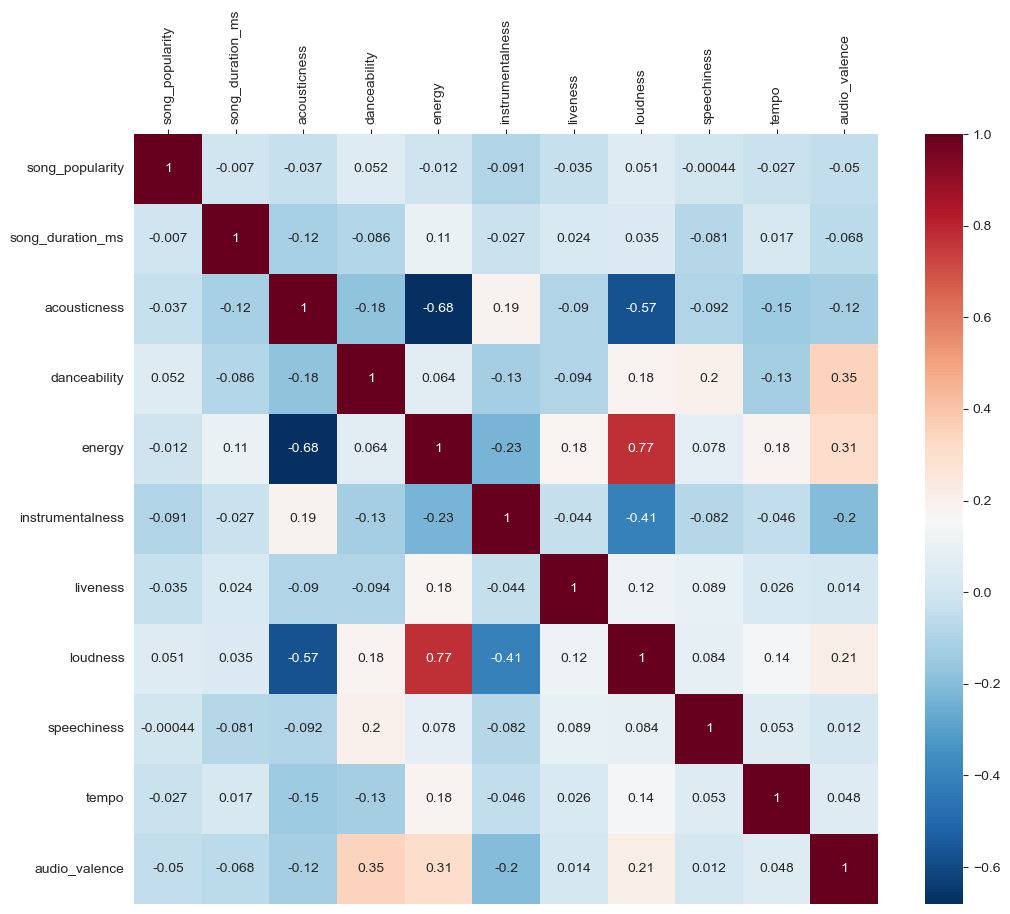

In [13]:
correlation_matrix = num.corr()

plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

# Zależności między zmienną objaśnianą a zmiennymi objaśniającymi

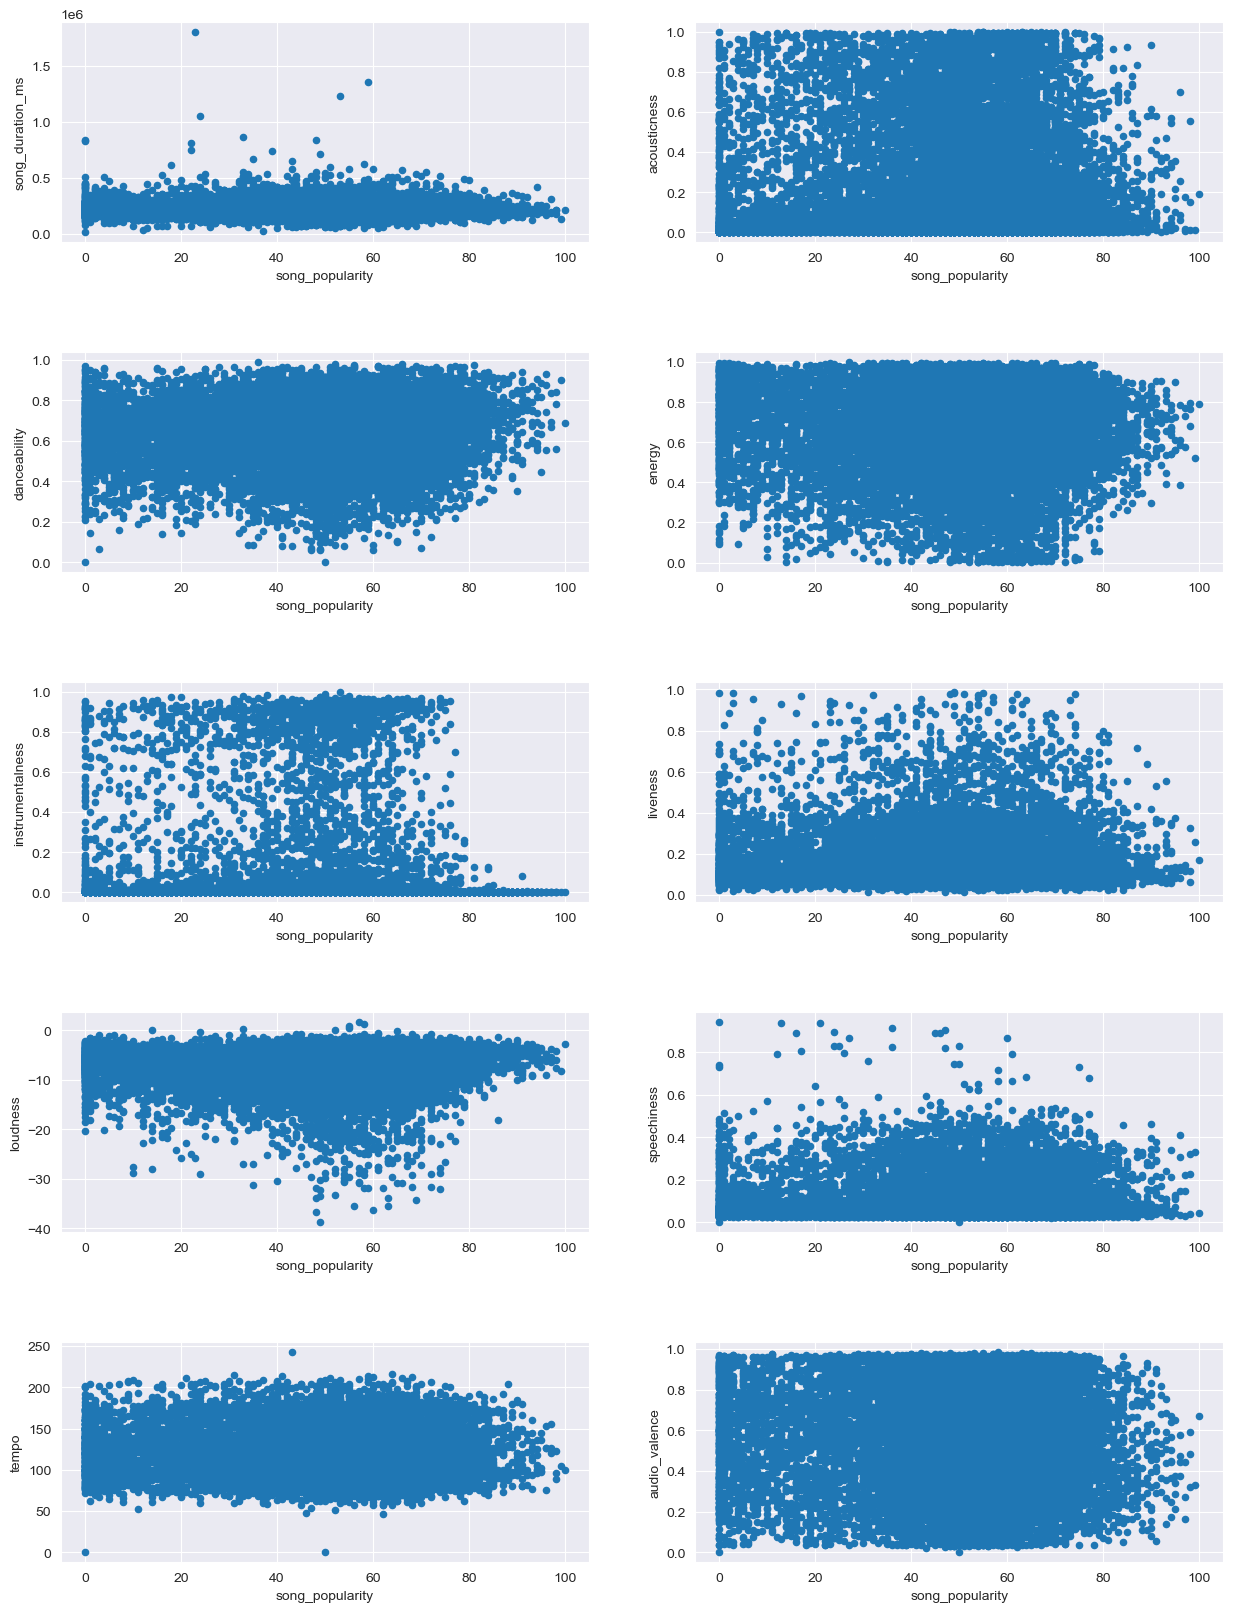

In [14]:
#numeric
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)
num.plot.scatter(x="song_popularity",
                 y="song_duration_ms",
                 ax=axes[0, 0])
num.plot.scatter(x="song_popularity",
                 y="acousticness",
                 ax=axes[0, 1])
num.plot.scatter(x="song_popularity",
                 y="danceability",
                 ax=axes[1, 0])
num.plot.scatter(x="song_popularity",
                 y="energy",
                 ax=axes[1, 1])
num.plot.scatter(x="song_popularity",
                 y="instrumentalness",
                 ax=axes[2, 0])
num.plot.scatter(x="song_popularity",
                 y="liveness",
                 ax=axes[2, 1])
num.plot.scatter(x="song_popularity",
                 y="loudness",
                 ax=axes[3, 0])
num.plot.scatter(x="song_popularity",
                 y="speechiness",
                 ax=axes[3, 1])
num.plot.scatter(x="song_popularity",
                 y="tempo",
                 ax=axes[4, 0])
num.plot.scatter(x="song_popularity",
                 y="audio_valence",
                 ax=axes[4, 1])

plt.show()


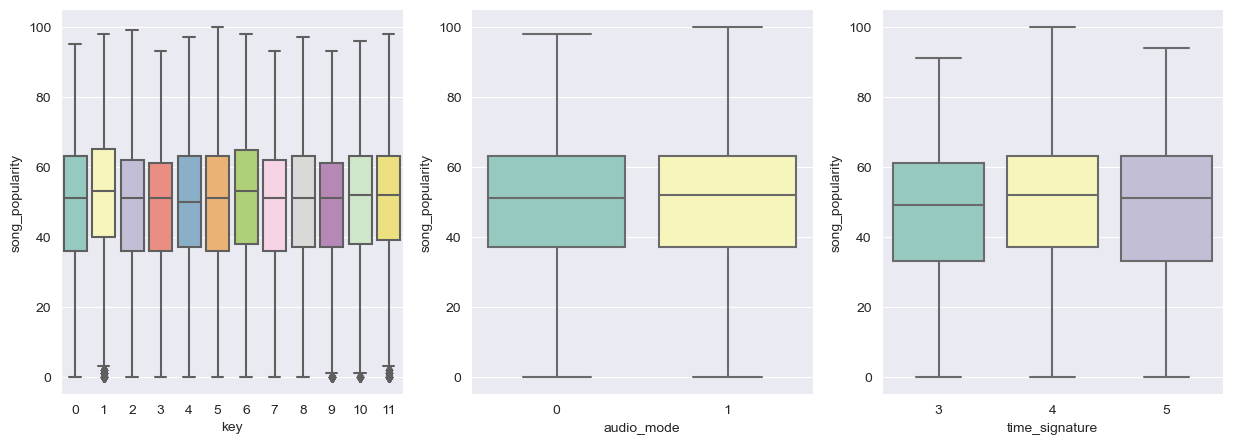

In [15]:
#categorical
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="key", y="song_popularity", data=df, palette="Set3", ax=ax1)
sns.boxplot(x="audio_mode", y="song_popularity", data=df, palette="Set3", ax=ax2)
sns.boxplot(x="time_signature", y="song_popularity", data=df, palette="Set3", ax=ax3)
plt.show()

# Normalizacja (numeric)

In [16]:
scaler = StandardScaler()
X = num.drop(["song_popularity"], axis=1)
X.iloc[:, 0:] = scaler.fit_transform(X.iloc[:, 0:].to_numpy())

# Pary wykresy (numeric)

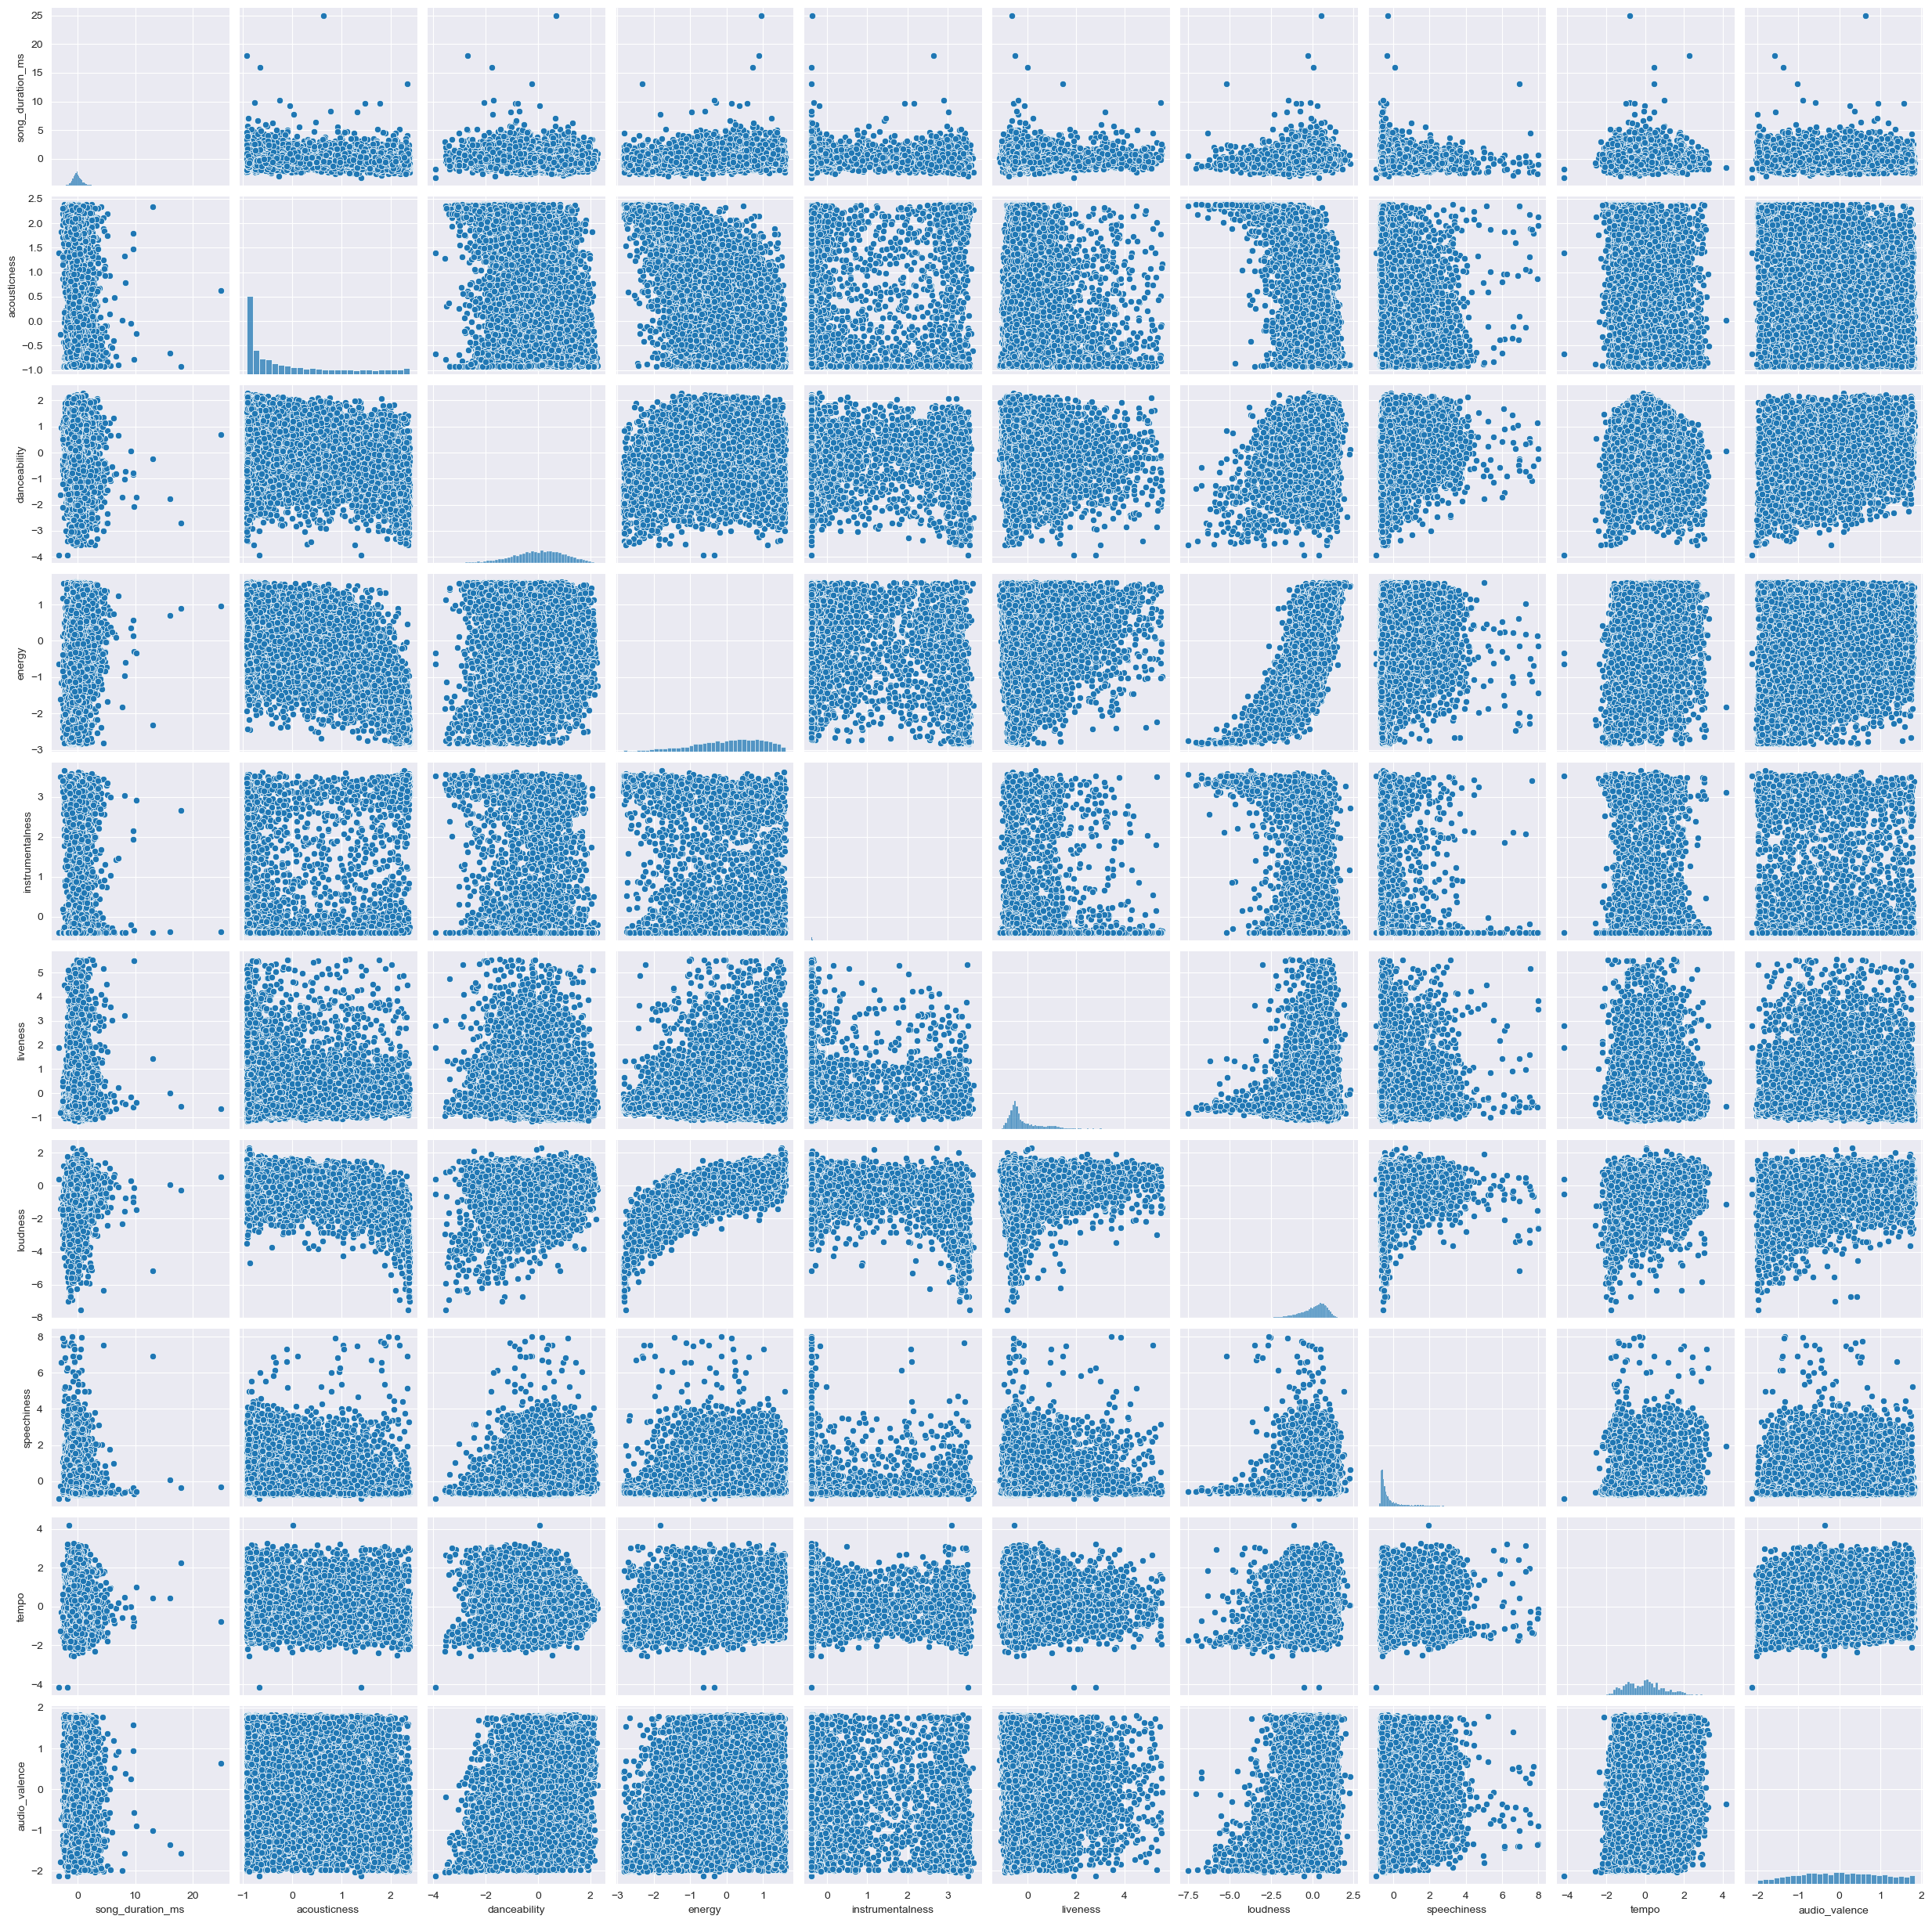

In [17]:
sns.pairplot(X)

# PCA (numeric)

In [18]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
print('Procent warincji wyjaśniony przez components: {}'.format(pca.explained_variance_ratio_))
print('Procent warincji wyjaśniony przez components (suma): {}'.format(pca.explained_variance_ratio_.cumsum()))

Procent warincji wyjaśniony przez components: [0.27782051 0.14042894 0.10819564 0.09866206 0.09328649 0.08707362
 0.08446633 0.05656271 0.03825218 0.01525151]
Procent warincji wyjaśniony przez components (suma): [0.27782051 0.41824945 0.52644509 0.62510715 0.71839364 0.80546726
 0.8899336  0.94649631 0.98474849 1.        ]
